### Linear Regression using Stochastic Gradient Descent (SGD)

This is a Linear Regression with Stochastic Gradient Descent(SGD) implementation using sklearn as a port of an offline Excel tutorial in my ebook from Jason Brownlee on machinelearningmastery.com. This is purely for practice of SGD with Linear Regression as stochastic gradient descent is important when dealing with other ML algorithms. 

This is still Linear Regression - one input, one response variable. This time we are just using an flavor of Gradient Descent to the construct the ML model.

The dataset values in the Excel spreadsheet are artificial and Jason, the author, uses the same small dataset in this online version of the tutorial on the machinelearningmaster.com website, referenced below.

I have separate notebooks for Stochastic Gradient Descent and Batch Gradient Descent, not included in this library. The tutorials focus on doing these tasks in isolation before doing it in ML algorithm scenarios. 

This uses SGD, so we are updating the derivative calculation per training instance unlike in batch where we cycle over all the training data instances in the batch before updating the derivative calculation. This was also an exercise we did in the MSc course before diving into ML implementations.

##### Dataset Source
- https://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/

Note the final prediction and model evaluation performance metric values are going to differ slightly here, though for most part, they are quiet close to the offline Excel predicted values and tutorial predicted values. 

By default, the sklearn SGDRegressor has default values and I have changed the two main ones (max_iter and alpha) to match the Excel tutorial input values. max_iter is the number of epochs. alpha is the learning rate. 

Note for SGD, we do not have batches of n-size training samples, we always update calculations for single training instance. 

For further background, refer here:
- https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
- https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/

RMSE error score is used as a performance evaluation metric for this ML model. For more information, refer here:
- https://en.wikipedia.org/wiki/Root-mean-square_deviation

Verified in O'Reilly textbook my SGDRegressor setup here as they did exact same thing in their Linear Regression with SGD example.

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model

# X input features need be in form of a 2D array or sklearn will thrown an error asking you to change it
# Scaler not used her for normalizing data which I would use but for purpose of tutorial, do NOT use it
X = [[1], [2], [4], [3], [5]]
y = [1, 3, 3, 2, 5]

##### Machine Learning Model and Training

In [2]:
# set up linear model using stochastic gradient descent, 4 epochs i.e. 20 iterations, to match offline example and tutorial 
lr_sgd = linear_model.SGDRegressor(max_iter=20, alpha=0.01, loss="squared_error")
lr_sgd.fit(X, y)

/Users/niallguerin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(alpha=0.01, max_iter=20)

Display intercept and print coefficient from our linear regression model. These are optimal weights W0 and W1 for the SGD formula where:
- W0 = W * alpha * delta 
- W1 = W * alpha * delta * X input feature dataset value

They correspond to the last iteration of Gradient Descent above in lr_sgd.fit(X,y) and map to B0 and B1 in the offline Excel spreadsheet and in the online tutorial dataset used as reference for this notebook template. 

In [3]:
lr_sgd.intercept_, lr_sgd.coef_, 

(array([0.24973862]), array([0.83639442]))

##### Linear Regression Model: Run Predictions

In [4]:
y_pred = lr_sgd.predict(X)

In [5]:
y_pred

array([1.08613305, 1.92252747, 3.59531632, 2.75892189, 4.43171074])

The predicted Y values in the corresponding Excel spreadsheet for LR with SGD are:
- 1.021336101 (Actual Y: 1)
- 1.811774711 (Actual Y: 3)
- 3.392651932 (Actual Y: 3)
- 2.602213322 (Actual Y: 2)
- 4.183090542 (Actual Y: 5)

##### Calculate Error: Root Mean Squared Error (RMSE)

In [6]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, y_pred, squared=False)

In [7]:
rmse

0.6959428992129655

Plot the linear model after using SGD implementation.

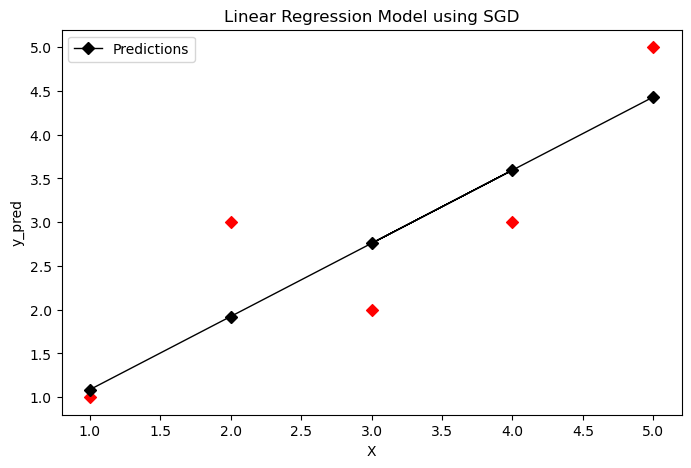

In [8]:
# Plot outputs
# https://matplotlib.org/stable/api/markers_api.html
# https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#sphx-glr-tutorials-intermediate-legend-guide-py
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set_title('Linear Regression Model using SGD')
plt.scatter(X, y, color="red", marker="D")
plt.plot(X, y_pred, color="black", marker="D", linewidth=1, label='Predictions')
plt.xlabel("X")
plt.ylabel("y_pred")
ax.set_xlabel('X')
ax.set_ylabel('y_pred')
ax.legend(loc='best')
plt.show()

Regarding randomness in machine learning, refer to this topic:
- https://machinelearningmastery.com/randomness-in-machine-learning/

Crosscheck your template use of sklearn library with O'Reilly textbook reference:
- https://machinelearning101.readthedocs.io/en/latest/_pages/11_example_simple_linear_regression.html#gradient-descent

#### Web Reference
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
- https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html